- 자료 수집 : 티머니 -> 이용안내 -> 대중교통 통계자료 -> 월간 교통 카드 통계 자료 
- https://pay.tmoney.co.kr/index.dev
- 최신자료 -> 지하철 시간대별 이용현황
- 데이터 영역을 잡고 -> 숫자로 변경 후 -> 셀서식 일반으로 , 제거 

1. csv 모듈의 reader 함수를 이용하여 행별로 데이터를 가져와 루프를 돌면 csv 파일을 읽는다.
2. next 함수는 다음 행으로 이동하고 싶거나 행을 넘겨버리고 싶을 때 사용한다.
3. 처음 open 함수를 이용하여 파일을 열었다면 마지막에는 close 함수를 사용하여 파일을 닫아줘야 한다.
4. matplotlib.pyplot 모듈은 MATLAB과 비슷하게 명령어 스타일로 동작하는 함수의 모음이다.
5. matplotlib.pyplot 모듈은 각각의 함수를 사용해서 간편하게 그래프를 만들고 변화를 줄 수 있다.

In [3]:
import csv

a = open("transport.csv", encoding="utf-8") # UTF-8로 인코딩된 파일을 열어서 a에 저장
data = csv.reader(a)    # csv.reader() 함수를 이용하여 파일을 읽어옴

for row in data:
    print(row)      # 리스트 형태로 출력
a.close()

['사용월', '호선명', '역ID', '지하철역', '04:00:00~04:59:59', '', '05:00:00~05:59:59', '', '06:00:00~06:59:59', '', '07:00:00~07:59:59', '', '08:00:00~08:59:59', '', '09:00:00~09:59:59', '', '10:00:00~10:59:59', '', '11:00:00~11:59:59', '', '12:00:00~12:59:59', '', '13:00:00~13:59:59', '', '14:00:00~14:59:59', '', '15:00:00~15:59:59', '', '16:00:00~16:59:59', '', '17:00:00~17:59:59', '', '18:00:00~18:59:59', '', '19:00:00~19:59:59', '', '20:00:00~20:59:59', '', '21:00:00~21:59:59', '', '22:00:00~22:59:59', '', '23:00:00~23:59:59', '', '00:00:00~00:59:59', '', '01:00:00~01:59:59', '', '02:00:00~02:59:59', '', '03:00:00~03:59:59', '']
['', '', '', '', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차']
['2024-04', '1호선', '0150', '서울역', '658', '24', '8560', '9158', '1

- 불필요한 부분 제거한 후 
- map을 사용하여 문자열 정보를 숫자로 변환

In [4]:
import csv

a = open("transport.csv", encoding="utf-8") # UTF-8로 인코딩된 파일을 열어서 a에 저장
data = csv.reader(a)    # csv.reader() 함수를 이용하여 파일을 읽어옴

next(a)     # 첫 번째 줄은 제목이므로 건너뜀
next(a)     # 두 번째 줄도 건너뜀

for row in data:
    row[4:] = map(int,row[4:])  # 4번째 열부터 끝까지 정수로 변환
    print(row)
a.close()

['2024-04', '1호선', '0150', '서울역', 658, 24, 8560, 9158, 14541, 62765, 43682, 121498, 75625, 247481, 69569, 165780, 64964, 89882, 83579, 79071, 92596, 85488, 91583, 85617, 77942, 77821, 107061, 80047, 121232, 85791, 186861, 97810, 232292, 97360, 127623, 68217, 88686, 49834, 89528, 45770, 60579, 30821, 28952, 14443, 3203, 3771, 3, 263, 0, 0, 0, 0]
['2024-04', '1호선', '0151', '시청', 94, 2, 2321, 5550, 4123, 26788, 7965, 76757, 11415, 204838, 13882, 94008, 16811, 50246, 22260, 45931, 23951, 41705, 32711, 41118, 40644, 32395, 55315, 28761, 63996, 27301, 98807, 28303, 164218, 26671, 65574, 13940, 58650, 10320, 51328, 8905, 32067, 6293, 10700, 4110, 661, 1172, 3, 40, 1, 0, 0, 0]
['2024-04', '1호선', '0152', '종각', 140, 4, 3754, 5916, 4432, 31983, 6987, 116830, 11438, 271585, 13857, 153462, 19090, 65403, 28559, 58646, 34028, 51264, 43174, 50404, 54045, 41831, 66388, 36375, 81012, 38714, 153426, 45018, 220336, 48477, 97736, 25030, 83719, 13279, 86190, 10047, 61700, 7354, 27596, 4706, 2029, 1395, 1, 2

- 출근시간 대 하차 인원 찾아보기 (7시~10시 전까지 )
- (i - 4) * 2 + 5 위치 찾기 
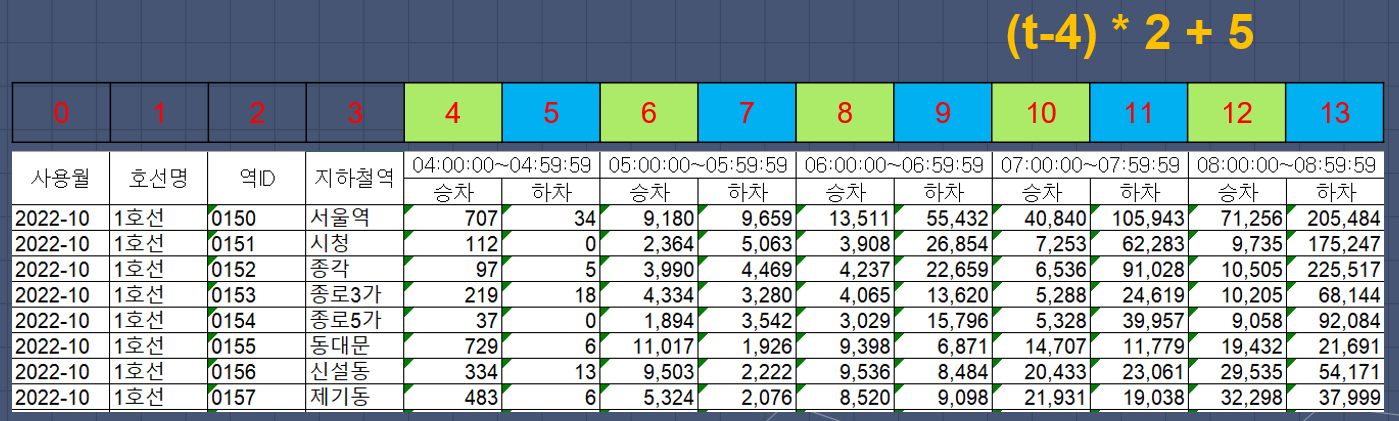

In [13]:
import csv

a = open("transport.csv", encoding="utf-8") # UTF-8로 인코딩된 파일을 열어서 a에 저장
data = csv.reader(a)    # csv.reader() 함수를 이용하여 파일을 읽어옴

next(a)     # 첫 번째 줄은 제목이므로 건너뜀
next(a)     # 두 번째 줄도 건너뜀

max = 0     # 최대값을 저장할 변수 max를 0으로 초기화
trans2 = ''  # 최대값을 가지는 호선과 역을 저장할 변수 trans를 빈 문자열로 초기화
for row in data:
    row[4:] = map(int,row[4:])  # 4번째 열부터 끝까지 정수로 변환
    sum = 0     # 합을 저장할 변수 sum을 0으로 초기화
    
    for i in range(7, 10):
        sum += row[(i-4) * 2 + 5]  # 7, 9, 11번째 열의 값을 더함
        trans = row[1] + ' ' + row[3]  + ' ' + str(sum) + '명' 
        print(trans)

    if sum > max:
        max = sum
        trans2 = row[1] + ' ' + row[3]  + ' ' + str(max) + '명' # 최대값을 가지는 호선과 역을 저장

print("=" * 50)
print(trans2)
a.close()

1호선 서울역 121498명
1호선 서울역 368979명
1호선 서울역 534759명
1호선 시청 76757명
1호선 시청 281595명
1호선 시청 375603명
1호선 종각 116830명
1호선 종각 388415명
1호선 종각 541877명
1호선 종로3가 28333명
1호선 종로3가 97915명
1호선 종로3가 164928명
1호선 종로5가 43604명
1호선 종로5가 143005명
1호선 종로5가 210789명
1호선 동대문 13074명
1호선 동대문 34002명
1호선 동대문 58413명
1호선 신설동 27491명
1호선 신설동 85895명
1호선 신설동 119010명
1호선 제기동 21872명
1호선 제기동 62371명
1호선 제기동 97215명
1호선 청량리(서울시립대입구) 18457명
1호선 청량리(서울시립대입구) 59124명
1호선 청량리(서울시립대입구) 99327명
1호선 동묘앞 10925명
1호선 동묘앞 34338명
1호선 동묘앞 52436명
2호선 시청 76398명
2호선 시청 309698명
2호선 시청 402843명
2호선 을지로입구 135359명
2호선 을지로입구 481475명
2호선 을지로입구 650219명
2호선 을지로3가 74711명
2호선 을지로3가 255116명
2호선 을지로3가 329892명
2호선 을지로4가 37771명
2호선 을지로4가 117429명
2호선 을지로4가 158340명
2호선 동대문역사문화공원(DDP) 25001명
2호선 동대문역사문화공원(DDP) 73835명
2호선 동대문역사문화공원(DDP) 106923명
2호선 신당 17550명
2호선 신당 49872명
2호선 신당 72786명
2호선 상왕십리 13134명
2호선 상왕십리 45378명
2호선 상왕십리 64752명
2호선 왕십리(성동구청) 14797명
2호선 왕십리(성동구청) 44611명
2호선 왕십리(성동구청) 65034명
2호선 한양대 13546명
2호선 한양대 90643명
2호선 한양대 152506명
2호선 뚝섬 42423명
2호선 뚝섬 188280명


- 각 호선 별로 역 이름과 인원수 리스트로 모으기 

In [14]:
import csv

a = open("transport.csv", encoding="utf-8") # UTF-8로 인코딩된 파일을 열어서 a에 저장
data = csv.reader(a)    # csv.reader() 함수를 이용하여 파일을 읽어옴

next(a)     # 첫 번째 줄은 제목이므로 건너뜀
next(a)     # 두 번째 줄도 건너뜀

name_list = []  # 역 이름을 저장할 리스트 name_list를 생성
sum_list = []   # 합을 저장할 리스트 sum_list를 생성    

line = input("호선을 입력하세요 : ")  # 호선을 입력받음

for row in data:

    if line == row[1]:     # 입력받은 호선과 같은 호선이면  
        row[4:] = map(int,row[4:])  # 4번째 열부터 끝까지 정수로 변환
        sum = 0     # 합을 저장할 변수 sum을 0으로 초기화
        
        for i in range(7, 10):
            sum += row[(i-4) * 2 + 5]  # 7, 9, 11번째 열의 값을 더함
        
        name_list.append(row[3])    # 역 이름을 리스트 name_list에 추가
        sum_list.append(sum)        # 합을 리스트 sum_list에 추가

print("=" * 50)
print(name_list)
print(sum_list)
a.close()

['시청', '을지로입구', '을지로3가', '을지로4가', '동대문역사문화공원(DDP)', '신당', '상왕십리', '왕십리(성동구청)', '한양대', '뚝섬', '성수', '건대입구', '구의(광진구청)', '강변(동서울터미널)', '잠실나루', '잠실(송파구청)', '잠실새내', '종합운동장', '삼성(무역센터)', '선릉', '역삼', '강남', '교대(법원.검찰청)', '서초', '방배', '사당', '낙성대(강감찬)', '서울대입구(관악구청)', '봉천', '신림', '신대방', '구로디지털단지', '대림(구로구청)', '신도림', '문래', '영등포구청', '당산', '합정', '홍대입구', '신촌', '이대', '아현', '충정로(경기대입구)', '용답', '신답', '신설동', '도림천', '양천구청', '신정네거리', '용두(동대문구청)']
[402843, 650219, 329892, 158340, 106923, 72786, 64752, 65034, 152506, 284542, 495415, 141914, 81485, 102529, 89782, 436959, 81432, 63382, 742891, 622717, 851828, 807627, 361566, 265959, 166717, 183977, 104306, 167557, 64161, 116668, 60526, 447400, 113367, 239086, 245715, 223318, 140065, 219135, 311977, 232557, 120797, 49823, 117979, 12042, 3838, 28378, 13318, 20029, 25430, 12073]


['당고개', '상계', '노원', '창동', '쌍문', '수유(강북구청)', '미아(서울사이버대학)', '미아사거리', '길음', '성신여대입구(돈암)', '한성대입구(삼선교)', '혜화', '동대문', '동대문역사문화공원(DDP)', '충무로', '명동', '회현(남대문시장)', '서울역', '숙대입구(갈월)', '삼각지', '신용산', '이촌(국립중앙박물관)', '동작(현충원)', '총신대입구(이수)', '사당', '남태령']
[27467, 61578, 163294, 101186, 68501, 120583, 83150, 89556, 83634, 98959, 84316, 267067, 174618, 140605, 368194, 293538, 314873, 195801, 119067, 46358, 208703, 63050, 13238, 95474, 100901, 12815]


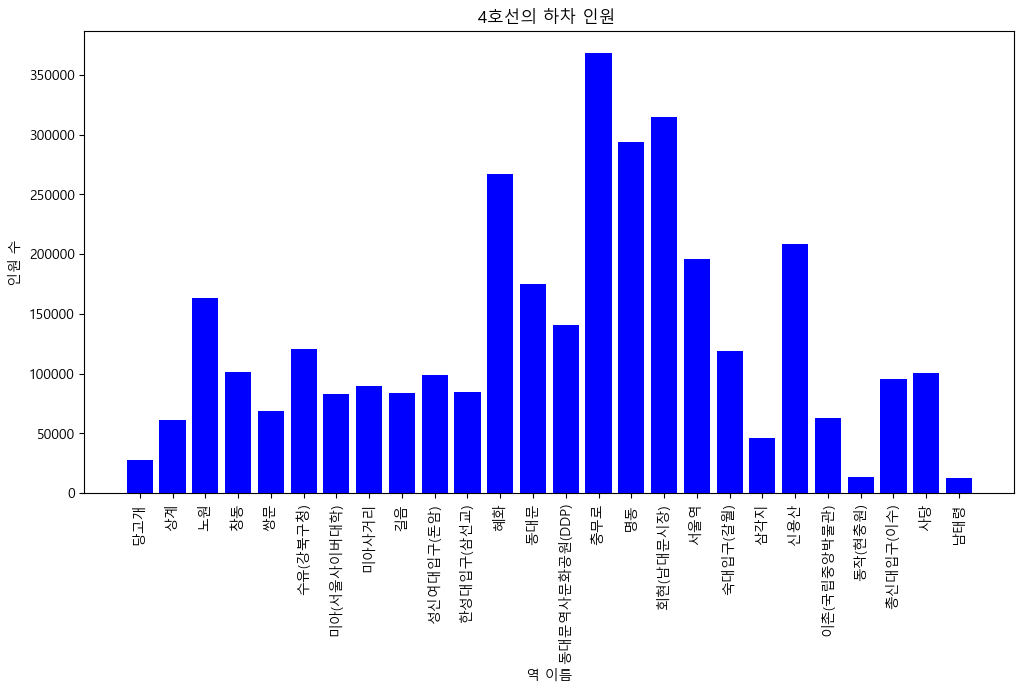

In [24]:
import csv

indata = open("transport.csv", encoding="utf-8") # UTF-8로 인코딩된 파일을 열어서 a에 저장
data = csv.reader(indata)    # csv.reader() 함수를 이용하여 파일을 읽어옴

next(indata)     # 첫 번째 줄은 제목이므로 건너뜀
next(indata)     # 두 번째 줄도 건너뜀

name_list = []  # 역 이름을 저장할 리스트 name_list를 생성
sum_list = []   # 합을 저장할 리스트 sum_list를 생성    

line = input("호선을 입력하세요 : ")  # 호선을 입력받음

for row in data:

    if line == row[1]:     # 입력받은 호선과 같은 호선이면  
        row[4:] = map(int,row[4:])  # 4번째 열부터 끝까지 정수로 변환
        sum = 0     # 합을 저장할 변수 sum을 0으로 초기화
        
        for i in range(7, 10):
            sum += row[(i-4) * 2 + 5]  # 7, 9, 11번째 열의 값을 더함
        
        name_list.append(row[3])    # 역 이름을 리스트 name_list에 추가
        sum_list.append(sum)        # 합을 리스트 sum_list에 추가

print("=" * 50)
print(name_list)
print(sum_list)
a.close()

import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(12, 6))
plt.bar(name_list, sum_list, color="blue")
plt.title(line + "의 하차 인원 ")
plt.xlabel("역 이름")
plt.ylabel("인원 수")
plt.xticks(rotation=90)
plt.show()